# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import lasso regression
from sklearn.linear_model import Lasso

# Import Ridge regression
from sklearn.linear_model import Ridge

# Import ElasticNet regression
from sklearn.linear_model import ElasticNet

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Pickle the best models for each dataset
import pickle

from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

from pprint import pprint

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')

In [3]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

In [5]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [6]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

# Linear Modeling

In [7]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)

In [8]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [9]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [10]:
for columns in [convabuse_X_numeric.columns, online_abusive_attacks_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')


In [11]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)

In [12]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)


In [13]:
convabuse_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
convabuse_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
convabuse_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

## Convabuse Lasso Regression

In [14]:
convabuse_lasso = Lasso()

convabuse_lasso_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

convabuse_lasso_regressor = GridSearchCV(
    convabuse_lasso,
    param_grid=convabuse_lasso_param_grid,
    scoring=rmse_scorer,
    cv=convabuse_lasso_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [15]:
convabuse_lasso_regressor.fit(convabuse_X_train, convabuse_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [16]:
pprint(convabuse_lasso_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


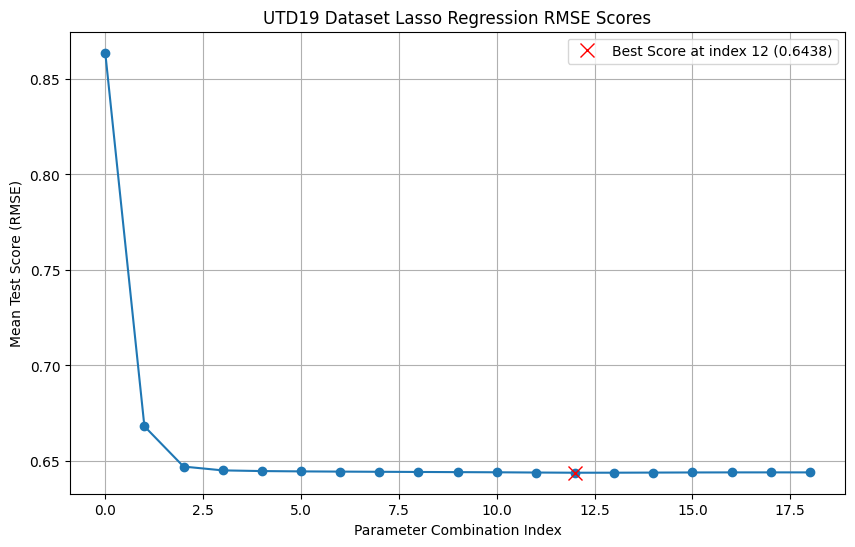

In [17]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-convabuse_lasso_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(convabuse_lasso_regressor.best_index_, -convabuse_lasso_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {convabuse_lasso_regressor.best_index_} ({-convabuse_lasso_regressor.best_score_:.4f})")
plt.legend()
plt.title('UTD19 Dataset Lasso Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [18]:
convabuse_lasso_best_score = -convabuse_lasso_regressor.best_score_
convabuse_lasso_best_params = convabuse_lasso_regressor.best_params_
convabuse_lasso_best_estimator = convabuse_lasso_regressor.best_estimator_
convabuse_lasso_best_estimator

Lasso(alpha=0.01, max_iter=13)

In [19]:
# Print the best score and parameters for the Lasso Regression model on the UTD19 training dataset
print(f"Lasso Regression Best Score (US Accidents): {-convabuse_lasso_best_score:.2f}")
print(f"Lasso Regression Best Parameters (US Accidents): {convabuse_lasso_best_params}")

Lasso Regression Best Score (US Accidents): -0.64
Lasso Regression Best Parameters (US Accidents): {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001}


In [20]:
# Predict on the test data using the best estimator
convabuse_lasso_predictions = convabuse_lasso_best_estimator.predict(convabuse_X_test)

# Calculate the RMSE and R2 score for the Lasso Regression model on the Convabuse testing dataset
convabuse_lasso_rmse = root_mean_squared_error(convabuse_y_test, convabuse_lasso_predictions)
convabuse_lasso_r2 = r2_score(convabuse_y_test, convabuse_lasso_predictions)

# Print the RMSE score for the Lasso Regression model on the Convabuse testing dataset
print(f"Lasso Regression RMSE (Convabuse): {convabuse_lasso_rmse:.2f}")

# Print the R2 score for the Lasso Regression model on the Convabuse dataset:
print(f"Lasso Regression R2 Score (Convabuse): {convabuse_lasso_r2:.2f}")

Lasso Regression RMSE (Convabuse): 0.64
Lasso Regression R2 Score (Convabuse): 0.80


In [21]:
# Get the coefficients and intercept of the Lasso Regression model
convabuse_lasso_coefficients = convabuse_lasso_best_estimator.coef_
convabuse_lasso_intercept = convabuse_lasso_best_estimator.intercept_

# Print the coefficients and intercept of the Lasso Regression model
print("Lasso Regression Coefficients:")
for feature, coef in zip(convabuse_X_train.columns, convabuse_lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
example_no: 0.0000
annotator_id: 0.0558
ableism: 0.0000
homophobic: 0.0194
intellectual: -0.0619
racist: 0.0871
sexist: 0.1247
sex_harassment: -0.0216
transphobic: 0.0022
generalised: 0.2464
individual: 0.3177
system: 0.8905
explicit: 0.3936
implicit: -0.0000


In [22]:
# Filter for features with lasso regression coefficients above 0:
convabuse_lasso_significant_features = convabuse_X_train.columns[convabuse_lasso_coefficients != 0]
convabuse_lasso_significant_features

Index(['annotator_id', 'homophobic', 'intellectual', 'racist', 'sexist',
       'sex_harassment', 'transphobic', 'generalised', 'individual', 'system',
       'explicit'],
      dtype='object')

In [23]:
convabuse_lasso_features = convabuse_X_train[convabuse_lasso_significant_features]
convabuse_lasso_features.head()

,annotator_id,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit
21622,-1.279419,-0.167512,3.290594,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,1.006457
17366,0.643907,-0.167512,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,-1.118094,-0.993584
20222,-1.760250,-0.167512,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,1.006457
30202,-1.279419,-0.167512,-0.303897,-0.121725,-0.336269,2.204300,-0.040393,-0.131367,-0.184547,0.894379,1.006457
20361,0.163076,5.969720,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,-0.993584


In [24]:
# Get the X_test version of the convabuse_lasso_features
convabuse_lasso_X_test = convabuse_X_test[convabuse_lasso_significant_features]

In [25]:
# Perform linear regression on the convabuse_lasso_features
convabuse_lasso_linear_model = LinearRegression()
convabuse_lasso_linear_model.fit(convabuse_lasso_features, convabuse_y_train)

LinearRegression()

In [26]:
# Predict using convabuse_lasso_linear_model
convabuse_lasso_linear_predictions = convabuse_lasso_linear_model.predict(convabuse_lasso_X_test)

# Get the RMSE and R2 scores
convabuse_lasso_linear_rmse = root_mean_squared_error(convabuse_y_test, convabuse_lasso_linear_predictions)
convabuse_lasso_linear_r2 = r2_score(convabuse_y_test, convabuse_lasso_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {convabuse_lasso_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {convabuse_lasso_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 0.64
Linear Regression R2 Score (Convabuse): 0.80


## Convabuse Ridge Regression

In [27]:
convabuse_ridge = Ridge()

convabuse_ridge_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

convabuse_ridge_regressor = GridSearchCV(
    convabuse_ridge,
    param_grid=convabuse_ridge_param_grid,
    scoring=rmse_scorer,
    cv=convabuse_ridge_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)


In [28]:
convabuse_ridge_regressor.fit(convabuse_X_train, convabuse_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [29]:
pprint(convabuse_ridge_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


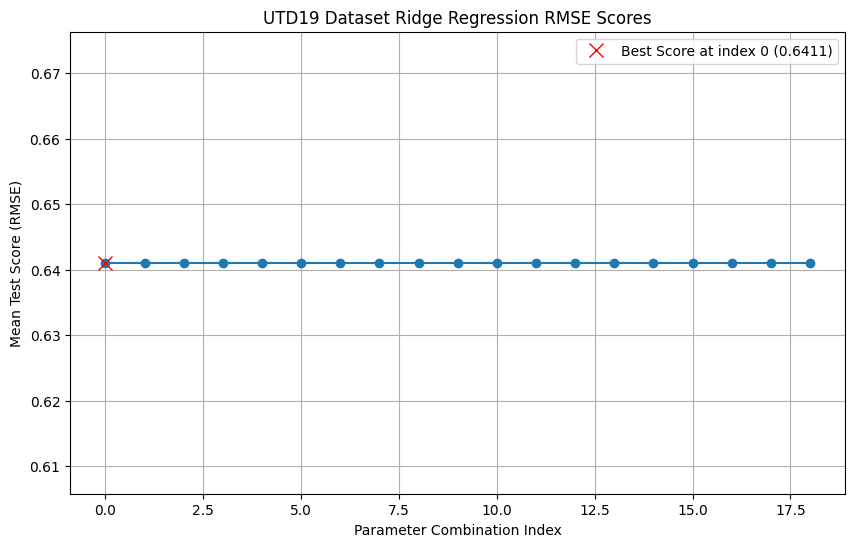

In [30]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-convabuse_ridge_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(convabuse_ridge_regressor.best_index_, -convabuse_ridge_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {convabuse_ridge_regressor.best_index_} ({-convabuse_ridge_regressor.best_score_:.4f})")
plt.legend()
plt.title('UTD19 Dataset Ridge Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [31]:
convabuse_ridge_best_score = -convabuse_ridge_regressor.best_score_
convabuse_ridge_best_params = convabuse_ridge_regressor.best_params_
convabuse_ridge_best_estimator = convabuse_ridge_regressor.best_estimator_
convabuse_ridge_best_estimator

Ridge(alpha=0.01, max_iter=1)

In [32]:
# Print the best score and parameters for the Lasso Regression model on the UTD19 training dataset
print(f"Lasso Regression Best Score (US Accidents): {-convabuse_ridge_best_score:.2f}")
print(f"Ridge Regression Best Parameters (US Accidents): {convabuse_ridge_best_params}")

Lasso Regression Best Score (US Accidents): -0.64
Ridge Regression Best Parameters (US Accidents): {'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001}


In [33]:
# Predict on the test data using the best estimator
convabuse_ridge_predictions = convabuse_ridge_best_estimator.predict(convabuse_X_test)

# Calculate the RMSE and R2 score for the Ridge Regression model on the Convabuse testing dataset
convabuse_ridge_rmse = root_mean_squared_error(convabuse_y_test, convabuse_ridge_predictions)
convabuse_ridge_r2 = r2_score(convabuse_y_test, convabuse_ridge_predictions)

# Print the RMSE score for the Ridge Regression model on the Convabuse testing dataset
print(f"Ridge Regression RMSE (Convabuse): {convabuse_ridge_rmse:.2f}")

# Print the R2 score for the Ridge Regression model on the Convabuse dataset:
print(f"Ridge Regression R2 Score (Convabuse): {convabuse_ridge_r2:.2f}")

Ridge Regression RMSE (Convabuse): 0.64
Ridge Regression R2 Score (Convabuse): 0.80


In [34]:
# Get the coefficients and intercept of the Ridge Regression model
convabuse_ridge_coefficients = convabuse_ridge_best_estimator.coef_
convabuse_ridge_intercept = convabuse_ridge_best_estimator.intercept_

# Print the coefficients and intercept of the Ridge Regression model
print("Ridge Regression Coefficients:")
for feature, coef in zip(convabuse_X_train.columns, convabuse_ridge_coefficients):
    print(f"{feature}: {coef:.4f}")

Ridge Regression Coefficients:
example_no: 0.0141
annotator_id: 0.0713
ableism: 0.0014
homophobic: 0.0259
intellectual: -0.0745
racist: 0.0930
sexist: 0.1338
sex_harassment: -0.0397
transphobic: 0.0083
generalised: 0.0819
individual: 0.0886
system: 0.2445
explicit: 1.0578
implicit: 0.4074


In [35]:
convabuse_ridge_coefficients.min()

np.float64(-0.07454069953729234)

In [36]:
convabuse_ridge_coefficients.max()

np.float64(1.057811299778411)

In [37]:
convabuse_ridge_coefficients.mean()

np.float64(0.15099871487319488)

In [38]:
# Filter for features with ridge regression coefficients above 0:
convabuse_ridge_significant_features = convabuse_X_train.columns[convabuse_ridge_coefficients > 0.1]
convabuse_ridge_significant_features

Index(['sexist', 'system', 'explicit', 'implicit'], dtype='object')

In [39]:
convabuse_ridge_features = convabuse_X_train[convabuse_ridge_significant_features]
convabuse_ridge_features.head()

,sexist,system,explicit,implicit
21622,-0.336269,0.894379,1.006457,-0.346282
17366,-0.336269,-1.118094,-0.993584,-0.346282
20222,-0.336269,0.894379,1.006457,-0.346282
30202,-0.336269,0.894379,1.006457,-0.346282
20361,-0.336269,0.894379,-0.993584,2.887822


In [40]:
# Get the X_test version of the convabuse_ridge_features
convabuse_ridge_X_test = convabuse_X_test[convabuse_ridge_significant_features]

In [41]:
# Perform linear regression on the convabuse_ridge_features
convabuse_ridge_linear_model = LinearRegression()
convabuse_ridge_linear_model.fit(convabuse_ridge_features, convabuse_y_train)

LinearRegression()

In [42]:
# Predict on convabuse_ridge_linear_model
convabuse_ridge_linear_predictions = convabuse_ridge_linear_model.predict(convabuse_ridge_X_test)

# Get the RMSE and R2 scores
convabuse_ridge_linear_rmse = root_mean_squared_error(convabuse_y_test, convabuse_ridge_linear_predictions)
convabuse_ridge_linear_r2 = r2_score(convabuse_y_test, convabuse_ridge_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {convabuse_ridge_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {convabuse_ridge_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 0.65
Linear Regression R2 Score (Convabuse): 0.79


## Convabuse ElasticNet Regression

In [43]:
convabuse_elasticnet = ElasticNet()

convabuse_elasticnet_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

convabuse_elasticnet_regressor = GridSearchCV(
    convabuse_elasticnet,
    param_grid=convabuse_elasticnet_param_grid,
    scoring=rmse_scorer,
    cv=convabuse_elasticnet_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [44]:
convabuse_elasticnet_regressor.fit(convabuse_X_train, convabuse_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [45]:
pprint(convabuse_elasticnet_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


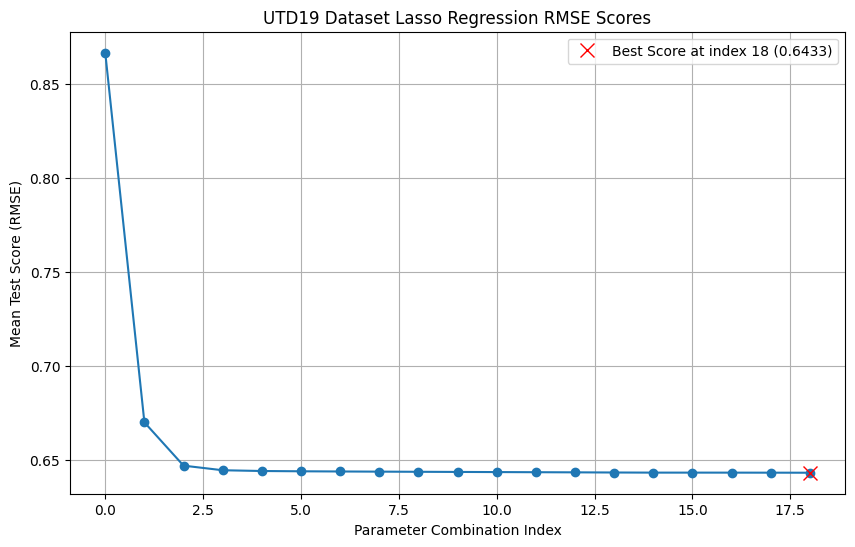

In [46]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-convabuse_elasticnet_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(convabuse_elasticnet_regressor.best_index_, -convabuse_elasticnet_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {convabuse_elasticnet_regressor.best_index_} ({-convabuse_elasticnet_regressor.best_score_:.4f})")
plt.legend()
plt.title('UTD19 Dataset Lasso Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [47]:
convabuse_elasticnet_best_score = -convabuse_elasticnet_regressor.best_score_
convabuse_elasticnet_best_params = convabuse_elasticnet_regressor.best_params_
convabuse_elasticnet_best_estimator = convabuse_elasticnet_regressor.best_estimator_
convabuse_elasticnet_best_estimator

ElasticNet(alpha=0.01, max_iter=19)

In [48]:
# Print the best score and parameters for the Lasso Regression model on the UTD19 training dataset
print(f"Lasso Regression Best Score (US Accidents): {-convabuse_elasticnet_best_score:.2f}")
print(f"Lasso Regression Best Parameters (US Accidents): {convabuse_elasticnet_best_params}")

Lasso Regression Best Score (US Accidents): -0.64
Lasso Regression Best Parameters (US Accidents): {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}


In [49]:
# Predict on the test data using the best estimator
convabuse_elasticnet_predictions = convabuse_elasticnet_best_estimator.predict(convabuse_X_test)

# Calculate the RMSE and R2 score for the Lasso Regression model on the Convabuse testing dataset
convabuse_elasticnet_rmse = root_mean_squared_error(convabuse_y_test, convabuse_elasticnet_predictions)
convabuse_elasticnet_r2 = r2_score(convabuse_y_test, convabuse_elasticnet_predictions)

# Print the RMSE score for the Lasso Regression model on the Convabuse testing dataset
print(f"Lasso Regression RMSE (Convabuse): {convabuse_elasticnet_rmse:.2f}")

# Print the R2 score for the Lasso Regression model on the Convabuse dataset:
print(f"Lasso Regression R2 Score (Convabuse): {convabuse_elasticnet_r2:.2f}")

Lasso Regression RMSE (Convabuse): 0.64
Lasso Regression R2 Score (Convabuse): 0.80


In [50]:
# Get the coefficients and intercept of the Lasso Regression model
convabuse_elasticnet_coefficients = convabuse_elasticnet_best_estimator.coef_
convabuse_elasticnet_intercept = convabuse_elasticnet_best_estimator.intercept_

# Print the coefficients and intercept of the Lasso Regression model
print("Lasso Regression Coefficients:")
for feature, coef in zip(convabuse_X_train.columns, convabuse_elasticnet_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
example_no: 0.0067
annotator_id: 0.0636
ableism: 0.0000
homophobic: 0.0254
intellectual: -0.0626
racist: 0.0909
sexist: 0.1301
sex_harassment: -0.0257
transphobic: 0.0051
generalised: 0.2402
individual: 0.3078
system: 0.8612
explicit: 0.4223
implicit: 0.0111


In [51]:
# Filter for features with lasso regression coefficients above 0:
convabuse_elasticnet_significant_features = convabuse_X_train.columns[convabuse_elasticnet_coefficients != 0]
convabuse_elasticnet_significant_features

Index(['example_no', 'annotator_id', 'homophobic', 'intellectual', 'racist',
       'sexist', 'sex_harassment', 'transphobic', 'generalised', 'individual',
       'system', 'explicit', 'implicit'],
      dtype='object')

In [52]:
convabuse_elasticnet_features = convabuse_X_train[convabuse_elasticnet_significant_features]
convabuse_elasticnet_features.head()

,example_no,annotator_id,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit
21622,0.922392,-1.279419,-0.167512,3.290594,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,1.006457,-0.346282
17366,-0.697198,0.643907,-0.167512,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,-1.118094,-0.993584,-0.346282
20222,-0.280790,-1.760250,-0.167512,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,1.006457,-0.346282
30202,0.753757,-1.279419,-0.167512,-0.303897,-0.121725,-0.336269,2.204300,-0.040393,-0.131367,-0.184547,0.894379,1.006457,-0.346282
20361,0.121806,0.163076,5.969720,-0.303897,-0.121725,-0.336269,-0.453659,-0.040393,-0.131367,-0.184547,0.894379,-0.993584,2.887822


In [53]:
# Get the X_test version of the convabuse_elasticnet_features
convabuse_elasticnet_X_test = convabuse_X_test[convabuse_elasticnet_significant_features]

In [54]:
# Perform linear regression on the convabuse_rmse_lasso_features
convabuse_elasticnet_linear_model = LinearRegression()
convabuse_elasticnet_linear_model.fit(convabuse_elasticnet_features, convabuse_y_train)

LinearRegression()

In [55]:
# Predict using convabuse_elasticnet_linear_model
convabuse_elasticnet_linear_predictions = convabuse_elasticnet_linear_model.predict(convabuse_elasticnet_X_test)

# Get the RMSE and R2 scores
convabuse_elasticnet_linear_rmse = root_mean_squared_error(convabuse_y_test, convabuse_elasticnet_linear_predictions)
convabuse_elasticnet_linear_r2 = r2_score(convabuse_y_test, convabuse_elasticnet_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {convabuse_elasticnet_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {convabuse_elasticnet_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 0.64
Linear Regression R2 Score (Convabuse): 0.80


## Online Abusive Attacks Lasso Regresion

In [56]:
online_abusive_attacks_lasso = Lasso()

online_abusive_attacks_lasso_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_lasso_regressor = GridSearchCV(
    online_abusive_attacks_lasso,
    param_grid=online_abusive_attacks_lasso_param_grid,
    scoring=rmse_scorer,
    cv=online_abusive_attacks_lasso_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [57]:
online_abusive_attacks_lasso_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [58]:
pprint(online_abusive_attacks_lasso_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


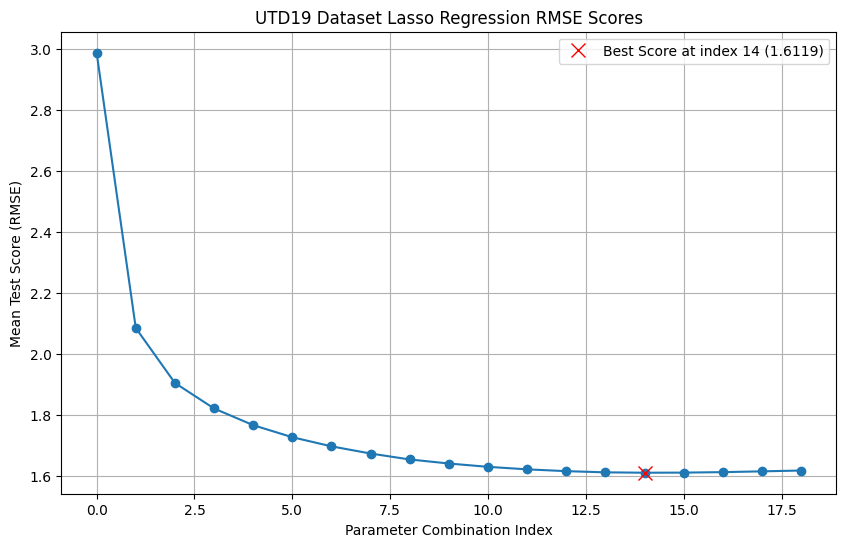

In [59]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-online_abusive_attacks_lasso_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_lasso_regressor.best_index_, -online_abusive_attacks_lasso_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_lasso_regressor.best_index_} ({-online_abusive_attacks_lasso_regressor.best_score_:.4f})")
plt.legend()
plt.title('UTD19 Dataset Lasso Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [60]:
online_abusive_attacks_lasso_best_score = -online_abusive_attacks_lasso_regressor.best_score_
online_abusive_attacks_lasso_best_params = online_abusive_attacks_lasso_regressor.best_params_
online_abusive_attacks_lasso_best_estimator = online_abusive_attacks_lasso_regressor.best_estimator_
online_abusive_attacks_lasso_best_estimator

Lasso(alpha=0.01, max_iter=15)

In [61]:
# Print the best score and parameters for Online Abusive Attacks Lasso Regression
print(f"Lasso Regression Best Score (US Accidents): {-online_abusive_attacks_lasso_best_score:.2f}")
print(f"Lasso Regression Best Parameters (US Accidents): {online_abusive_attacks_lasso_best_params}")

Lasso Regression Best Score (US Accidents): -1.61
Lasso Regression Best Parameters (US Accidents): {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001}


In [62]:
# Predict on the test data using the best estimator
online_abusive_attacks_lasso_predictions = online_abusive_attacks_lasso_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks Lasso Regression
online_abusive_attacks_lasso_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_lasso_predictions)
online_abusive_attacks_lasso_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_lasso_predictions)

# Print the RMSE score for Online Abusive Attacks Lasso Regression
print(f"Lasso Regression RMSE (UTD19): {online_abusive_attacks_lasso_rmse:.2f}")
print(f"Lasso Regression R2 Score (UTD19): {online_abusive_attacks_lasso_r2:.2f}")

Lasso Regression RMSE (UTD19): 3.98
Lasso Regression R2 Score (UTD19): 0.93


In [63]:
# Get the coefficients and intercept of Online Abusive Attacks Lasso Regression
online_abusive_attacks_lasso_coefficients = online_abusive_attacks_lasso_best_estimator.coef_
online_abusive_attacks_lasso_intercept = online_abusive_attacks_lasso_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks Lasso Regression
print("Lasso Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
verified: -0.0806
high Identity_Attack: -0.0024
high Insult: 2.5769
high Profanity: 4.4107
high Threat: 0.2965
high other attr: 0.0000


In [64]:
# Filter for features with lasso regression coefficients above 0:
online_abusive_attacks_lasso_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_lasso_coefficients != 0]
online_abusive_attacks_lasso_significant_features

Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat'],
      dtype='object')

In [65]:
online_abusive_attacks_lasso_features = online_abusive_attacks_X_train[online_abusive_attacks_lasso_significant_features]
online_abusive_attacks_lasso_features.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat
2280,-0.310532,-0.157331,-0.100107,-0.128451,-0.000425
1894,-0.310532,-0.157331,-0.100107,-0.128451,-0.112108
1480,-0.310532,-0.157331,-0.100107,-0.128451,-0.112108
480,-0.310532,-0.157331,-0.100107,-0.128451,-0.112108
2020,-0.310532,0.133363,-0.100107,-0.094937,-0.112108


In [66]:
# Get the X_test version of the online_abusive_attacks_lasso_features
online_abusive_attacks_lasso_X_test = online_abusive_attacks_X_test[online_abusive_attacks_lasso_significant_features]

In [67]:
# Perform linear regression on the online_abusive_attacks_lasso_features
online_abusive_attacks_lasso_linear_model = LinearRegression()
online_abusive_attacks_lasso_linear_model.fit(online_abusive_attacks_lasso_features, online_abusive_attacks_y_train)

LinearRegression()

In [68]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_lasso_linear_predictions = online_abusive_attacks_lasso_linear_model.predict(online_abusive_attacks_lasso_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_lasso_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_lasso_linear_predictions)
online_abusive_attacks_lasso_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_lasso_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {online_abusive_attacks_lasso_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {online_abusive_attacks_lasso_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 4.13
Linear Regression R2 Score (Convabuse): 0.93


## Online Abusive Attacks Ridge Regression

In [69]:
online_abusive_attacks_ridge = Ridge()

online_abusive_attacks_ridge_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_ridge_regressor = GridSearchCV(
    online_abusive_attacks_ridge,
    param_grid=online_abusive_attacks_ridge_param_grid,
    scoring=rmse_scorer,
    cv=online_abusive_attacks_ridge_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [70]:
online_abusive_attacks_ridge_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [71]:
pprint(online_abusive_attacks_ridge_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


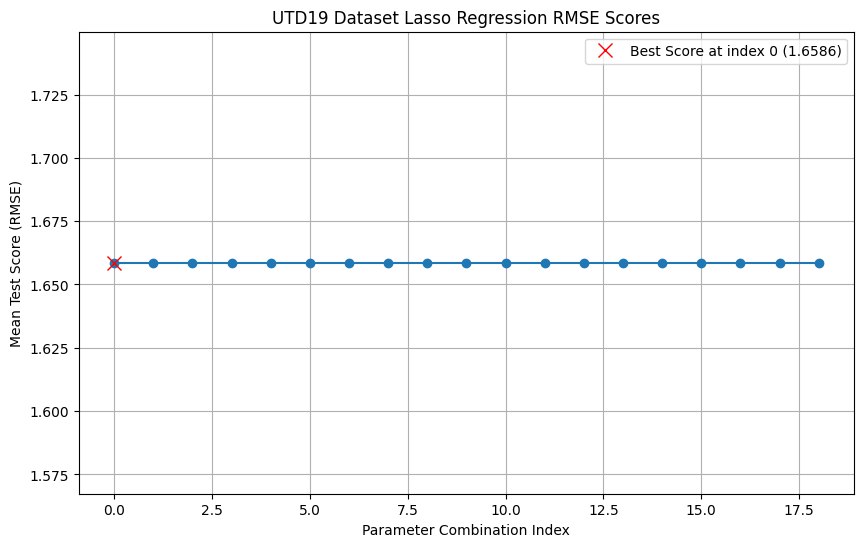

In [72]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-online_abusive_attacks_ridge_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_ridge_regressor.best_index_, -online_abusive_attacks_ridge_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_ridge_regressor.best_index_} ({-online_abusive_attacks_ridge_regressor.best_score_:.4f})")
plt.legend()
plt.title('UTD19 Dataset Lasso Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [73]:
online_abusive_attacks_ridge_best_score = -online_abusive_attacks_ridge_regressor.best_score_
online_abusive_attacks_ridge_best_params = online_abusive_attacks_ridge_regressor.best_params_
online_abusive_attacks_ridge_best_estimator = online_abusive_attacks_ridge_regressor.best_estimator_
online_abusive_attacks_ridge_best_estimator

Ridge(alpha=0.01, max_iter=1)

In [74]:
# Print the best score and parameters for Online Abusive Attacks Ridge Regression
print(f"Lasso Regression Best Score (US Accidents): {-online_abusive_attacks_ridge_best_score:.2f}")
print(f"Lasso Regression Best Parameters (US Accidents): {online_abusive_attacks_ridge_best_params}")

Lasso Regression Best Score (US Accidents): -1.66
Lasso Regression Best Parameters (US Accidents): {'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001}


In [75]:
# Predict on the test data using the best estimator
online_abusive_attacks_ridge_predictions = online_abusive_attacks_ridge_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks Ridge Regression
online_abusive_attacks_ridge_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_ridge_predictions)
online_abusive_attacks_ridge_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_ridge_predictions)

# Print the RMSE score for Online Abusive Attacks Ridge Regression
print(f"Lasso Regression RMSE (UTD19): {online_abusive_attacks_ridge_rmse:.2f}")
print(f"Lasso Regression R2 Score (UTD19): {online_abusive_attacks_ridge_r2:.2f}")

Lasso Regression RMSE (UTD19): 4.13
Lasso Regression R2 Score (UTD19): 0.93


In [76]:
# Get the coefficients and intercept of Online Abusive Attacks Ridge Regression
online_abusive_attacks_ridge_coefficients = online_abusive_attacks_ridge_best_estimator.coef_
online_abusive_attacks_ridge_intercept = online_abusive_attacks_ridge_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks Ridge Regression
print("Lasso Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_ridge_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
verified: -0.0567
high Identity_Attack: -0.0003
high Insult: 2.3431
high Profanity: 4.1802
high Threat: 0.6274
high other attr: 0.0000


In [77]:
# Filter for features with ridge regression coefficients above 0:
online_abusive_attacks_ridge_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_ridge_coefficients > 0]
online_abusive_attacks_ridge_significant_features

Index(['high Insult', 'high Profanity', 'high Threat'], dtype='object')

In [78]:
online_abusive_attacks_ridge_features = online_abusive_attacks_X_train[online_abusive_attacks_ridge_significant_features]
online_abusive_attacks_ridge_features.head()

,high Insult,high Profanity,high Threat
2280,-0.100107,-0.128451,-0.000425
1894,-0.100107,-0.128451,-0.112108
1480,-0.100107,-0.128451,-0.112108
480,-0.100107,-0.128451,-0.112108
2020,-0.100107,-0.094937,-0.112108


In [79]:
# Get the X_test version of the online_abusive_attacks_ridge_features
online_abusive_attacks_ridge_X_test = online_abusive_attacks_X_test[online_abusive_attacks_ridge_significant_features]

In [80]:
# Perform linear regression on the online_abusive_attacks_ridge_features
online_abusive_attacks_ridge_linear_model = LinearRegression()
online_abusive_attacks_ridge_linear_model.fit(online_abusive_attacks_ridge_features, online_abusive_attacks_y_train)

LinearRegression()

In [81]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_ridge_linear_predictions = online_abusive_attacks_ridge_linear_model.predict(online_abusive_attacks_ridge_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_ridge_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_ridge_linear_predictions)
online_abusive_attacks_ridge_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_ridge_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {online_abusive_attacks_ridge_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {online_abusive_attacks_ridge_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 4.16
Linear Regression R2 Score (Convabuse): 0.93


## Online Abusive Attacks ElasticNet Regression

In [82]:
online_abusive_attacks_elasticnet = ElasticNet()

online_abusive_attacks_elasticnet_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_elasticnet_regressor = GridSearchCV(
    online_abusive_attacks_elasticnet,
    param_grid=online_abusive_attacks_elasticnet_param_grid,
    scoring=rmse_scorer,
    cv=online_abusive_attacks_elasticnet_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [83]:
online_abusive_attacks_elasticnet_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(root_mean_squared_error, greater_is_better=False, response_method='predict'),
             verbose=1)

In [84]:
pprint(online_abusive_attacks_elasticnet_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


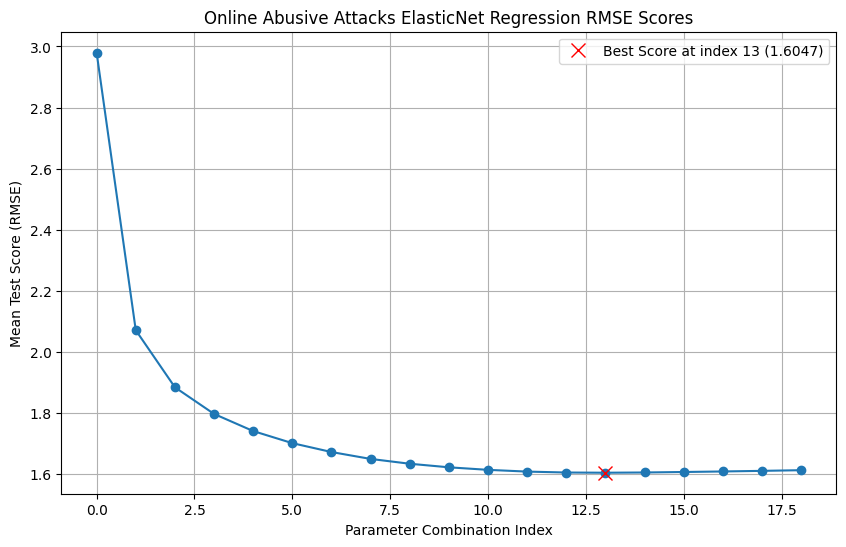

In [85]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-online_abusive_attacks_elasticnet_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_elasticnet_regressor.best_index_, -online_abusive_attacks_elasticnet_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_elasticnet_regressor.best_index_} ({-online_abusive_attacks_elasticnet_regressor.best_score_:.4f})")
plt.legend()
plt.title('Online Abusive Attacks ElasticNet Regression RMSE Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (RMSE)')
plt.grid()
plt.show()

In [86]:
online_abusive_attacks_elasticnet_best_score = -online_abusive_attacks_elasticnet_regressor.best_score_
online_abusive_attacks_elasticnet_best_params = online_abusive_attacks_elasticnet_regressor.best_params_
online_abusive_attacks_elasticnet_best_estimator = online_abusive_attacks_elasticnet_regressor.best_estimator_
online_abusive_attacks_elasticnet_best_estimator

ElasticNet(alpha=0.01, max_iter=14)

In [87]:
# Print the best score and parameters for the Lasso Regression model on the UTD19 training dataset
print(f"Online Abusive Attacks ElasticNet Regression Best Score: {-online_abusive_attacks_elasticnet_best_score:.2f}")
print(f"Online Abusive Attacks ElasticNet Regression Best Parameters: {online_abusive_attacks_elasticnet_best_params}")

Online Abusive Attacks ElasticNet Regression Best Score: -1.60
Online Abusive Attacks ElasticNet Regression Best Parameters: {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001}


In [88]:
# Predict on the test data using the best estimator
online_abusive_attacks_elasticnet_predictions = online_abusive_attacks_elasticnet_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks ElasticNet Regression
online_abusive_attacks_elasticnet_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_predictions)
online_abusive_attacks_elasticnet_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_predictions)

# Print the RMSE score for Online Abusive Attacks ElasticNet Regression
print(f"Online Abusive Attacks ElasticNet Regression RMSE: {online_abusive_attacks_elasticnet_rmse:.2f}")
print(f"Online Abusive Attacks ElasticNet Regression R2 Score: {online_abusive_attacks_elasticnet_r2:.2f}")

Online Abusive Attacks ElasticNet Regression RMSE: 4.02
Online Abusive Attacks ElasticNet Regression R2 Score: 0.93


In [89]:
# Get the coefficients and intercept of Online Abusive Attacks ElasticNet Regression
online_abusive_attacks_elasticnet_coefficients = online_abusive_attacks_elasticnet_best_estimator.coef_
online_abusive_attacks_elasticnet_intercept = online_abusive_attacks_elasticnet_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks ElasticNet Regression
print("Online Abusive Attacks ElasticNet Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_elasticnet_coefficients):
    print(f"{feature}: {coef:.4f}")

Online Abusive Attacks ElasticNet Regression Coefficients:
verified: -0.0806
high Identity_Attack: -0.0000
high Insult: 2.5694
high Profanity: 4.3229
high Threat: 0.3633
high other attr: 0.0000


In [90]:
# Filter for features with lasso regression coefficients above 0:
online_abusive_attacks_elasticnet_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_elasticnet_coefficients > 0]
online_abusive_attacks_elasticnet_significant_features

Index(['high Insult', 'high Profanity', 'high Threat'], dtype='object')

In [91]:
online_abusive_attacks_elasticnet_features = online_abusive_attacks_X_train[online_abusive_attacks_elasticnet_significant_features]
online_abusive_attacks_elasticnet_features.head()

,high Insult,high Profanity,high Threat
2280,-0.100107,-0.128451,-0.000425
1894,-0.100107,-0.128451,-0.112108
1480,-0.100107,-0.128451,-0.112108
480,-0.100107,-0.128451,-0.112108
2020,-0.100107,-0.094937,-0.112108


In [92]:
# Get the X_test version of the online_abusive_attacks_lasso_features
online_abusive_attacks_elasticnet_X_test = online_abusive_attacks_X_test[online_abusive_attacks_elasticnet_significant_features]

In [93]:
# Perform linear regression on the online_abusive_attacks_lasso_features
online_abusive_attacks_elasticnet_linear_model = LinearRegression()
online_abusive_attacks_elasticnet_linear_model.fit(online_abusive_attacks_elasticnet_features, online_abusive_attacks_y_train)

LinearRegression()

In [94]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_elasticnet_linear_predictions = online_abusive_attacks_elasticnet_linear_model.predict(online_abusive_attacks_elasticnet_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_elasticnet_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_linear_predictions)
online_abusive_attacks_elasticnet_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {online_abusive_attacks_elasticnet_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {online_abusive_attacks_elasticnet_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 4.16
Linear Regression R2 Score (Convabuse): 0.93


## Feature Regression Model Summary

In [95]:
# Create a feature regression model dictionary where each dataset maps to its RMSE and R2
feature_regression_model_summary_data = [
    {
        "Model": "Lasso Regularization",
        "Dataset": "Convabuse",
        "RMSE": convabuse_lasso_rmse,
        "R2": convabuse_lasso_r2
    },
    {
        "Model": "Ridge Regularization",
        "Dataset": "Convabuse",
        "RMSE": convabuse_ridge_rmse,
        "R2": convabuse_ridge_r2
    },
    {
        "Model": "ElasticNet Regularization",
        "Dataset": "Convabuse",
        "RMSE": convabuse_elasticnet_rmse,
        "R2": convabuse_elasticnet_r2
    },
    {
        "Model": "Lasso Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_lasso_rmse,
        "R2": online_abusive_attacks_lasso_r2
    },
    {
        "Model": "Ridge Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_ridge_rmse,
        "R2": online_abusive_attacks_ridge_r2
    },
    {
        "Model": "ElasticNet Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_elasticnet_rmse,
        "R2": online_abusive_attacks_elasticnet_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
feature_regression_model_summary = pd.DataFrame(feature_regression_model_summary_data)
feature_regression_model_summary

,Model,Dataset,RMSE,R2
0,Lasso Regularization,Convabuse,0.639312,0.795491
1,Ridge Regularization,Convabuse,0.636337,0.797390
2,ElasticNet Regularization,Convabuse,0.638838,0.795794
3,Lasso Regularization,Online Abusive Attacks,3.981809,0.933342
4,Ridge Regularization,Online Abusive Attacks,4.129597,0.928302
5,ElasticNet Regularization,Online Abusive Attacks,4.018055,0.932123


In [96]:
# Create a linear regression model dictionary where each dataset maps to its RMSE and R2
linear_regression_model_summary_data = [
    {
        "Model": "Lasso Linear Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_lasso_linear_rmse,
        "R2": convabuse_lasso_linear_r2
    },
    {
        "Model": "Ridge Linear Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_ridge_linear_rmse,
        "R2": convabuse_ridge_linear_r2
    },
    {
        "Model": "ElasticNet Linear Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_elasticnet_linear_rmse,
        "R2": convabuse_elasticnet_linear_r2
    },
    {
        "Model": "Linear Lasso Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_lasso_linear_rmse,
        "R2": online_abusive_attacks_lasso_linear_r2
    },
    {
        "Model": "Linear Ridge Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_ridge_linear_rmse,
        "R2": online_abusive_attacks_ridge_linear_r2
    },
    {
        "Model": "Linear ElasticNet Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_elasticnet_linear_rmse,
        "R2": online_abusive_attacks_elasticnet_linear_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
linear_regression_model_summary = pd.DataFrame(linear_regression_model_summary_data)
linear_regression_model_summary

,Model,Dataset,RMSE,R2
0,Lasso Linear Regression,Convabuse,0.638997,0.795693
1,Ridge Linear Regression,Convabuse,0.654855,0.785426
2,ElasticNet Linear Regression,Convabuse,0.636320,0.797401
3,Linear Lasso Regression,Online Abusive Attacks,4.129479,0.928306
4,Linear Ridge Regression,Online Abusive Attacks,4.155793,0.927389
5,Linear ElasticNet Regression,Online Abusive Attacks,4.155793,0.927389


In [97]:
# Compare the feature regression and linear regression model results for RMSE and R2
for model_name in feature_regression_model_summary.index:
    print(f"Model: {model_name}")
    feature_regression_rmse = feature_regression_model_summary.loc[model_name, "RMSE"]
    feature_regression_r2 = feature_regression_model_summary.loc[model_name, "R2"]
    linear_regression_rmse = linear_regression_model_summary.loc[model_name, "RMSE"]
    linear_regression_r2 = linear_regression_model_summary.loc[model_name, "R2"]
    if feature_regression_rmse > linear_regression_rmse:
      print(f"Feature Regularization RMSE: {feature_regression_rmse:.2f} > Linear Regression RMSE: {linear_regression_rmse:.2f}")
      print(f"Feature Regularization yielded the worse RMSE score")
    else:
      print(f"Feature Regression RMSE: {feature_regression_rmse:.2f} < Linear Regression RMSE: {linear_regression_rmse:.2f}")
      print(f"Linear Regression yielded the worse RMSE score")
    if feature_regression_r2 > linear_regression_r2:
      print(f"Feature Regularization R2: {feature_regression_r2:.2f} > Linear Regression R2: {linear_regression_r2:.2f}")
      print(f"Feature Regularization yielded the better R2 score")
    else:
      print(f"Feature Regularization R2: {feature_regression_r2:.2f} < Linear Regression R2: {linear_regression_r2:.2f}")
      print(f"Linear Regression yielded the better R2 score")
    print()

Model: 0
Feature Regularization RMSE: 0.64 > Linear Regression RMSE: 0.64
Feature Regularization yielded the worse RMSE score
Feature Regularization R2: 0.80 < Linear Regression R2: 0.80
Linear Regression yielded the better R2 score

Model: 1
Feature Regression RMSE: 0.64 < Linear Regression RMSE: 0.65
Linear Regression yielded the worse RMSE score
Feature Regularization R2: 0.80 > Linear Regression R2: 0.79
Feature Regularization yielded the better R2 score

Model: 2
Feature Regularization RMSE: 0.64 > Linear Regression RMSE: 0.64
Feature Regularization yielded the worse RMSE score
Feature Regularization R2: 0.80 < Linear Regression R2: 0.80
Linear Regression yielded the better R2 score

Model: 3
Feature Regression RMSE: 3.98 < Linear Regression RMSE: 4.13
Linear Regression yielded the worse RMSE score
Feature Regularization R2: 0.93 > Linear Regression R2: 0.93
Feature Regularization yielded the better R2 score

Model: 4
Feature Regression RMSE: 4.13 < Linear Regression RMSE: 4.16
Li

In [98]:
# Determine the model with the best R2 score for Convabuse
convabuse_models = ["Convabuse Linear Regression (Lasso Features)", "Convabuse Ridge Regression", "Convabuse ElasticNet Regression"]
convabuse_r2_scores = convabuse_lasso_linear_r2, convabuse_ridge_r2, convabuse_elasticnet_r2
best_convabuse_r2 = max(convabuse_r2_scores)
best_convabuse_r2_index = convabuse_r2_scores.index(best_convabuse_r2)
best_convabuse_model = convabuse_models[best_convabuse_r2_index]
print(f"The {best_convabuse_model} model has the best R2 score for Convabuse: {best_convabuse_r2:.2f}")

The Convabuse Ridge Regression model has the best R2 score for Convabuse: 0.80


In [99]:
# Determine the model with the best R2 score for Online Abusive Attacks
online_abusive_attacks_models = ["Online Abusive Attacks Lasso Regression", "Online Abusive Attacks Ridge Regression", "Online Abusive Attacks ElasticNet Regression"]
online_abusive_attacks_r2_scores = online_abusive_attacks_lasso_r2, online_abusive_attacks_ridge_r2, online_abusive_attacks_elasticnet_r2
best_online_abusive_attacks_r2 = max(online_abusive_attacks_r2_scores)
best_online_abusive_attacks_r2_index = online_abusive_attacks_r2_scores.index(best_online_abusive_attacks_r2)
best_online_abusive_attacks_model = online_abusive_attacks_models[best_online_abusive_attacks_r2_index]
print(f"The {best_online_abusive_attacks_model} model has the best R2 score for Online Abusive Attacks: {best_online_abusive_attacks_r2:.2f}")

The Online Abusive Attacks Lasso Regression model has the best R2 score for Online Abusive Attacks: 0.93


In [100]:
# Combine the feature_regression_model_summary and the linear_regression_model_summary
feature_regularization_summary = pd.concat([feature_regression_model_summary, linear_regression_model_summary], axis=0)
feature_regularization_summary

,Model,Dataset,RMSE,R2
0,Lasso Regularization,Convabuse,0.639312,0.795491
1,Ridge Regularization,Convabuse,0.636337,0.797390
2,ElasticNet Regularization,Convabuse,0.638838,0.795794
3,Lasso Regularization,Online Abusive Attacks,3.981809,0.933342
4,Ridge Regularization,Online Abusive Attacks,4.129597,0.928302
5,ElasticNet Regularization,Online Abusive Attacks,4.018055,0.932123
0,Lasso Linear Regression,Convabuse,0.638997,0.795693
1,Ridge Linear Regression,Convabuse,0.654855,0.785426
2,ElasticNet Linear Regression,Convabuse,0.636320,0.797401
3,Linear Lasso Regression,Online Abusive Attacks,4.129479,0.928306


In [101]:
# Output the feature_regularization_summary
feature_regularization_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model2_feature-regularization-summary.csv", index=False)